Importing libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
from tensorflow import train
import math
from keras.callbacks import EarlyStopping


In [3]:
def function(x,y):
    return math.cos(x+6*0.35*y) + 2*0.35*x*y

Creating dataset with 5000 samples to implement a (simple) neural network with TensorFlow 

In [4]:
train_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(100)])
train_outputs = np.array([function(i[0],i[1]) for i in train_inputs])
test_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(81)])
test_outputs = np.array([function(i[0],i[1]) for i in test_inputs])

Splitting dataset into test and training set


In [5]:
print(train_inputs.shape)
print(train_outputs.shape)
print(test_inputs.shape)
print(test_outputs.shape)

(100, 2)
(100,)
(81, 2)
(81,)


Build Model

In [6]:
model1 = keras.Sequential()
model1.add(layers.Dense(2, activation="sigmoid", input_shape=(2,)))
model1.add(layers.Dense(1, activation="sigmoid"))

model2 = keras.Sequential()
model2.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
model2.add(layers.Dense(1, activation="sigmoid"))

model3 = keras.Sequential()
model3.add(layers.Dense(50, activation="sigmoid", input_shape=(2,)))
model3.add(layers.Dense(1, activation="sigmoid"))

overfitCallback = EarlyStopping(monitor='loss', min_delta=0.0005, patience = 50)

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Selecting Optimizer 

In [8]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1)

Compiling Models

In [9]:
model1.compile(optimizer=optimizer, loss='MSE')
model2.compile(optimizer=optimizer, loss='MSE')
model3.compile(optimizer=optimizer, loss='MSE')

Training Models with training dataset 

In [10]:
history1= model1.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])
history2= model2.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])
history3= model3.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])

Epoch 1/1000000
100/100 [==============================] - 0s 3ms/step - loss: 0.2175 - val_loss: 0.2247
Epoch 2/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.1950 - val_loss: 0.2185
Epoch 3/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.1941 - val_loss: 0.2171
Epoch 4/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.1938 - val_loss: 0.2185
Epoch 5/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.1930 - val_loss: 0.2164
Epoch 6/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.1930 - val_loss: 0.2189
Epoch 7/1000000
100/100 [==============================] - 0s 1ms/step - loss: 0.1920 - val_loss: 0.2226
Epoch 8/1000000
100/100 [==============================] - 0s 1ms/step - loss: 0.1916 - val_loss: 0.2272
Epoch 9/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.1923 - val_loss: 0.2223
Epoch 10/1000000
100/100 [=============================

Plotting training and validation loss

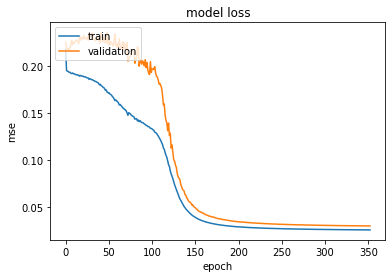

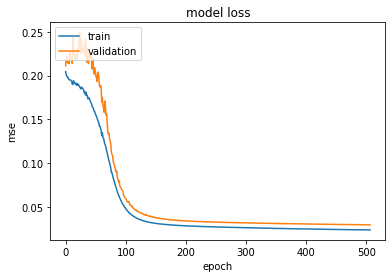

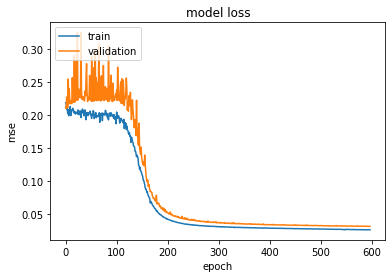

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
data = np.array([[0.01, 0.32], [0.22, 0.02]])
prediction1 = model1.predict(data)
prediction2 = model2.predict(data)
prediction3 = model3.predict(data)
print(prediction1)
print(prediction2)
print(prediction3)
print(function(0.01,0.32))
print(function(0.22,0.02))

[[0.7716911]
 [0.8684807]]
[[0.8218279 ]
 [0.90249276]]
[[0.83619046]
 [0.910578  ]]
0.7785535783963625
0.9689538845941909


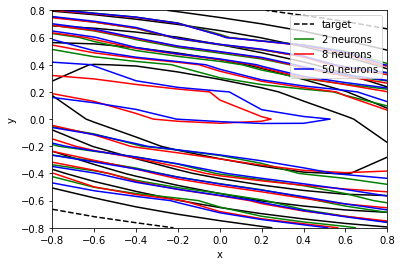

In [36]:
xs = np.arange(-0.8, 1, 0.2)
ys = np.arange(-0.8, 1, 0.2)
target = []
for y in ys:
    target.append([function(x,y) for x in xs])
p1 = []
for y in ys:
    p1.append([model1.predict([[x,y]])[0][0] for x in xs])
p2 = []
for y in ys:
    p2.append([model2.predict([[x,y]])[0][0] for x in xs])
p3 = []
for y in ys:
    p3.append([model3.predict([[x,y]])[0][0] for x in xs])
target = np.array(target)
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
np.shape(target)
np.shape(p1)
np.shape(p2)
np.shape(p3)
X, Y = np.meshgrid(xs, ys)
CS = plt.contour(X, Y, target, colors='k')
neuron2 = plt.contour(X, Y, p1, colors='g')
neuron8 = plt.contour(X, Y, p2, colors='r')
neuron50 = plt.contour(X, Y, p3, colors='b')
l1,_ = CS.legend_elements()
l2,_ = neuron2.legend_elements()
l3,_ = neuron8.legend_elements()
l4,_ = neuron50.legend_elements()
plt.legend([l1[0], l2[0], l3[0], l4[0],], ['target', '2 neurons', '8 neurons', '50 neurons']) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. Sigmoid activation functions were used in these experiments

In [40]:
traingd = tf.compat.v1.train.GradientDescentOptimizer(0.02)
traingdm = tf.compat.v1.train.MomentumOptimizer(0.02,0)
traingrms = keras.optimizers.RMSprop(learning_rate=0.02)

In [48]:
dmodel1 = keras.Sequential()
dmodel1.add(layers.Dense(2, activation="sigmoid", input_shape=(2,)))
dmodel1.add(layers.Dense(1, activation="sigmoid"))

dmodel2 = keras.Sequential()
dmodel2.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
dmodel2.add(layers.Dense(1, activation="sigmoid"))

dmodel3 = keras.Sequential()
dmodel3.add(layers.Dense(50, activation="sigmoid", input_shape=(2,)))
dmodel3.add(layers.Dense(1, activation="sigmoid"))

In [49]:
dmodel1.compile(optimizer=traingd, loss='MSE')
dmodel2.compile(optimizer=traingd, loss='MSE')
dmodel3.compile(optimizer=traingd, loss='MSE')

In [51]:
dhistory1= dmodel1.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)
dhistory2= dmodel2.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)
dhistory3= dmodel3.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2074 - val_loss: 0.2333
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.2016 - val_loss: 0.2262
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1989 - val_loss: 0.2223
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1977 - val_loss: 0.2200
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1971 - val_loss: 0.2186
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1968 - val_loss: 0.2174
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1967 - val_loss: 0.2167
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1966 - val_loss: 0.2162
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1965 - val_loss: 0.2161
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1965 - val_lo

In [53]:
dmmodel1 = keras.Sequential()
dmmodel1.add(layers.Dense(2, activation="sigmoid", input_shape=(2,)))
dmmodel1.add(layers.Dense(1, activation="sigmoid"))

dmmodel2 = keras.Sequential()
dmmodel2.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
dmmodel2.add(layers.Dense(1, activation="sigmoid"))

dmmodel3 = keras.Sequential()
dmmodel3.add(layers.Dense(50, activation="sigmoid", input_shape=(2,)))
dmmodel3.add(layers.Dense(1, activation="sigmoid"))

In [54]:
dmmodel1.compile(optimizer=traingdm, loss='MSE')
dmmodel2.compile(optimizer=traingdm, loss='MSE')
dmmodel3.compile(optimizer=traingdm, loss='MSE')

In [55]:
dmhistory1= dmmodel1.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)
dmhistory2= dmmodel2.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)
dmhistory3= dmmodel3.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2081 - val_loss: 0.2293
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2024 - val_loss: 0.2232
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1998 - val_loss: 0.2189
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1984 - val_loss: 0.2167
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1977 - val_loss: 0.2151
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1973 - val_loss: 0.2141
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1971 - val_loss: 0.2136
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1969 - val_loss: 0.2133
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1969 - val_loss: 0.2130
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1968 - val_lo

In [56]:
rmsmodel1 = keras.Sequential()
rmsmodel1.add(layers.Dense(2, activation="sigmoid", input_shape=(2,)))
rmsmodel1.add(layers.Dense(1, activation="sigmoid"))

rmsmodel2 = keras.Sequential()
rmsmodel2.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
rmsmodel2.add(layers.Dense(1, activation="sigmoid"))

rmsmodel3 = keras.Sequential()
rmsmodel3.add(layers.Dense(50, activation="sigmoid", input_shape=(2,)))
rmsmodel3.add(layers.Dense(1, activation="sigmoid"))


In [57]:
rmsmodel1.compile(optimizer=traingrms, loss='MSE')
rmsmodel2.compile(optimizer=traingrms, loss='MSE')
rmsmodel3.compile(optimizer=traingrms, loss='MSE')

In [58]:
rmshistory1= rmsmodel1.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)
rmshistory2= rmsmodel2.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)
rmshistory3= rmsmodel3.fit(train_inputs,train_outputs,epochs=100,validation_data=(test_inputs,test_outputs),batch_size=1)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.2100 - val_loss: 0.2212
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1961 - val_loss: 0.2134
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1929 - val_loss: 0.2225
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1906 - val_loss: 0.2207
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1872 - val_loss: 0.2207
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1834 - val_loss: 0.2238
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1765 - val_loss: 0.2260
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1701 - val_loss: 0.2362
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1650 - val_loss: 0.2303
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1591 - val_lo

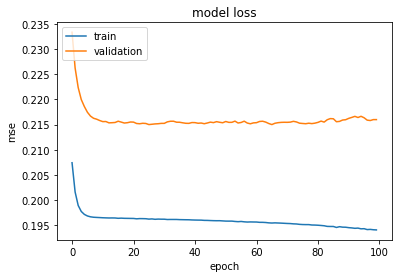

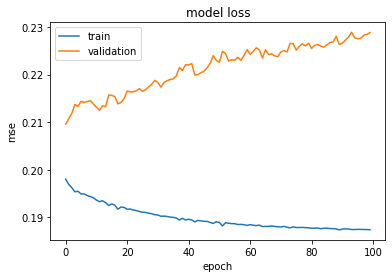

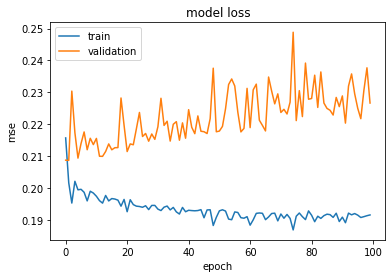

In [59]:
plt.plot(dhistory1.history['loss'])
plt.plot(dhistory1.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(dhistory2.history['loss'])
plt.plot(dhistory2.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(dhistory3.history['loss'])
plt.plot(dhistory3.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

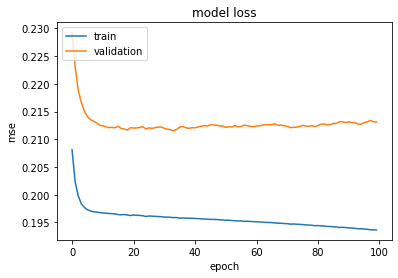

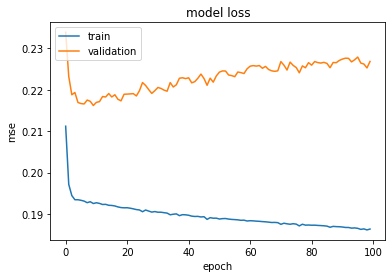

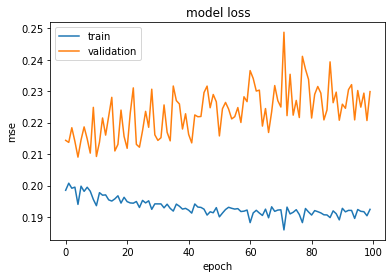

In [60]:
plt.plot(dmhistory1.history['loss'])
plt.plot(dmhistory1.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(dmhistory2.history['loss'])
plt.plot(dmhistory2.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(dmhistory3.history['loss'])
plt.plot(dmhistory3.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

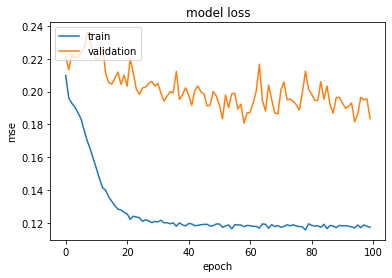

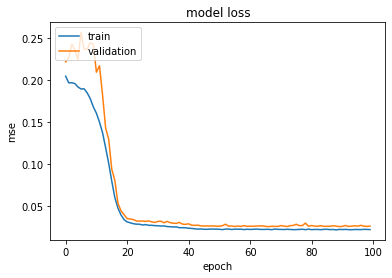

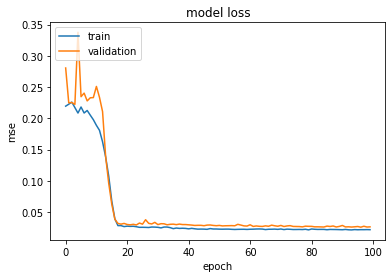

In [61]:
plt.plot(rmshistory1.history['loss'])
plt.plot(rmshistory1.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(rmshistory2.history['loss'])
plt.plot(rmshistory2.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(rmshistory3.history['loss'])
plt.plot(rmshistory3.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()